In [3]:
#Load required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from datetime import datetime
from tqdm import tqdm
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix

Loading and Viewing Data

Dataset: https://www.kaggle.com/kemical/kickstarter-projects

In [2]:
#Load Data
data = pd.read_csv('data.csv')

In [5]:
#View top 5 rows of data
data.head(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [6]:
data.groupby('state').size()

state
canceled       38779
failed        197719
live            2799
successful    133956
suspended       1846
undefined       3562
dtype: int64

In [4]:
#Statistics for continuous variable
data.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [5]:
#columns name
data.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [6]:
#Data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [10]:
#Check which column has null value
data.isnull().any()

ID                  False
name                 True
category            False
main_category       False
currency            False
deadline            False
goal                False
launched            False
pledged             False
state               False
backers             False
country             False
usd pledged          True
usd_pledged_real    False
usd_goal_real       False
dtype: bool

Check missing value data for 'name' and 'usd pleged' column

In [15]:
x = data.columns
data[x][data['name'].isnull()]

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
166851,1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,100.0,failed,1,US,100.00,100.00,200000.00
307234,634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,196.0,failed,12,GB,317.73,316.05,3224.97
309991,648853978,NaN,Product Design,Design,USD,2016-07-18,2500.0,2016-06-18 05:01:47,0.0,suspended,0,US,0.00,0.00,2500.00
338931,796533179,NaN,Painting,Art,USD,2011-12-05,35000.0,2011-11-06 23:55:55,220.0,failed,5,US,220.00,220.00,35000.00


In [9]:
data[x][data['usd pledged'].isnull()] #missing value in 'usd pledged' column is for N,O" country

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
169,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.00,undefined,0,"N,0""",NaN,555.00,6500.00
328,100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,undefined,0,"N,0""",NaN,3402.08,3211.53
632,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,undefined,0,"N,0""",NaN,3576.00,3500.00
647,1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,7007.80,undefined,0,"N,0""",NaN,7007.80,6000.00
749,1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23 03:09:49,3660.38,undefined,0,"N,0""",NaN,3660.38,3000.00
824,1004013077,Spencer Capier Instrumental Project 2015,Music,Music,CAD,2014-10-10,4000.0,2014-09-10 22:51:01,4760.00,undefined,0,"N,0""",NaN,4251.14,3572.39
844,1004126342,LUKAS LIGETI'S 50TH BIRTHDAY FESTIVAL: ORIGINA...,Music,Music,USD,2015-06-11,5000.0,2015-05-15 02:12:35,6370.00,undefined,0,"N,0""",NaN,6370.00,5000.00
864,1004255433,The Battle For Breukelen: A Neighborhood Epic,Film & Video,Film & Video,USD,2015-11-07,6000.0,2015-10-10 18:45:24,6695.00,undefined,0,"N,0""",NaN,6695.00,6000.00
870,1004298993,"""Tamboura Plays Violin"" - a collection of Pop ...",Music,Music,USD,2015-03-28,2750.0,2015-02-11 19:28:27,2926.00,undefined,0,"N,0""",NaN,2926.00,2750.00
890,1004402863,Nightingale Noel - An A Cappella Holiday CD,Music,Music,USD,2015-12-11,1200.0,2015-11-11 21:02:55,1585.00,undefined,0,"N,0""",NaN,1585.00,1200.00


Counting number of entries in each category, defined function 'catcount'

In [10]:
def catcount(d):
    count = {}
    for i in d:
        count[i]= count.get(i,0)+1
    
    return (count) 

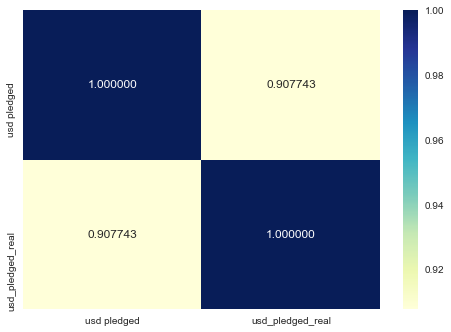

In [11]:
#Checking relationship between 'usd pledged','usd_pledged_real'
r_pledged = data[data.country!='N,0"']
#usd pledged','usd_pledged_real']]
c = r_pledged[['usd pledged','usd_pledged_real']].corr()
sns.heatmap(c,annot =True,fmt="f", cmap="YlGnBu")
plt.show()


Since 'usd pledged','usd_pledged_real' are converted value from other currency with different api and we can see from above heatmap they have high correlation, I will using one of them i.e.'usd_pledged_real' as it does not have missing value.

As 'ID' and mostly 'Name' are uniquely defined therefore I removed this columns.From below result only 2229 out of 378661 i.e 0.6% of total data.


In [12]:
count = catcount(data['name'])
x=0
for i,j in count.items():
    if(j>1):
        x=x+1
print ("Number of more than one entries {}".format(x))

Number of more than one entries 2229


Dividing Data in Response, categorical and continuous variable

In [13]:
#Response Variable
Y = data['state'].values
#Continuous varibales
c_data= data[['goal','pledged','backers','usd_pledged_real','usd_goal_real']]# not using 'ID', 'name',usd pledged' as discussed earlier
#Categorical variables
cat_data = data[['category','main_category','currency','country']]

# Response Variable

Find categories in Y and number of entries in Y

{'failed': 197719, 'canceled': 38779, 'successful': 133956, 'live': 2799, 'undefined': 3562, 'suspended': 1846}


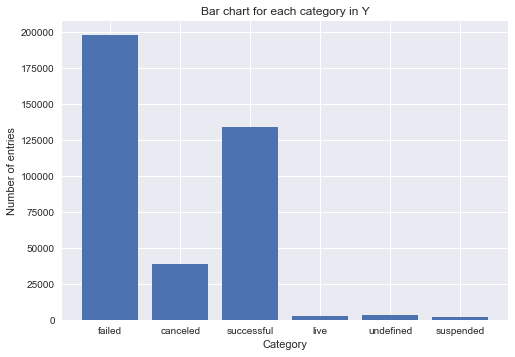

In [14]:
count_Y = catcount(Y)
print(count_Y)
plt.bar(np.arange(len(count_Y.keys())),list(count_Y.values()),tick_label = count_Y.keys() )
plt.title('Bar chart for each category in Y')
plt.xlabel('Category')
plt.ylabel('Number of entries')
plt.show()

As from the above data, most of data belongs to 2 categories 'failed' and 'successful'. Since we have to predict whether the project is successful or not, I wil use other categories into 2 categories i.e. 'failed' and 'successful'. 
'Canceled','Undefined' and 'Suspended' is similar to failure of project therefore I put this categories in failed category.
'Live' is considered in successful category. 


ASSUMPTION: I am assuming that I discussed this categorization with project manager and it is approved. 
Otherwise I can train the model by using data with only failed and successful categories in response variable by removing the rows with canceled, live and suspended categories.

In [15]:
fail = ['failed','canceled','undefined','suspended']
success =  ['successful','live']
for i in range(len(Y)):
    if(Y[i] in fail):
        Y[i]=0
    else:
        Y[i] = 1

{0: 241906, 1: 136755}


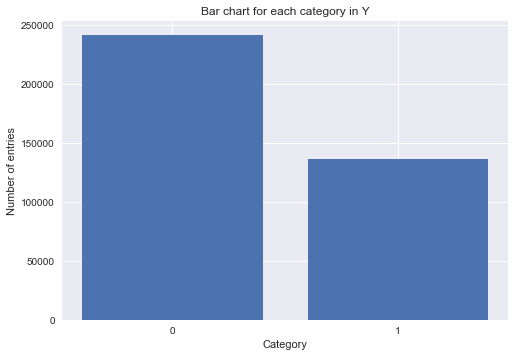

In [16]:
count_Y = catcount(Y)
print(count_Y)
plt.bar(np.arange(len(count_Y.keys())),list(count_Y.values()),tick_label = count_Y.keys())
plt.title('Bar chart for each category in Y')
plt.xlabel('Category')
plt.ylabel('Number of entries')
plt.show()

# Variables

{'Poetry': 1369, 'Narrative Film': 5188, 'Music': 15727, 'Film & Video': 10108, 'Restaurants': 2819, 'Food': 11493, 'Drinks': 2422, 'Product Design': 22314, 'Documentary': 16139, 'Nonfiction': 8318, 'Indie Rock': 5657, 'Crafts': 4664, 'Games': 3226, 'Tabletop Games': 14180, 'Design': 4199, 'Comic Books': 2743, 'Art Books': 2676, 'Fashion': 8554, 'Childrenswear': 483, 'Theater': 7057, 'Comics': 4996, 'DIY': 1173, 'Webseries': 5762, 'Animation': 2541, 'Food Trucks': 1752, 'Public Art': 3077, 'Illustration': 3175, 'Photography': 5752, 'Pop': 3350, 'People': 1103, 'Art': 8253, 'Family': 336, 'Fiction': 9169, 'Accessories': 3165, 'Rock': 6758, 'Hardware': 3663, 'Software': 3048, 'Weaving': 93, 'Gadgets': 2965, 'Web': 5153, 'Jazz': 1850, 'Ready-to-wear': 864, 'Festivals': 839, 'Video Games': 11830, 'Anthologies': 784, 'Publishing': 6018, 'Shorts': 12357, 'Electronic Music': 2170, 'Radio & Podcasts': 923, 'Apps': 6345, 'Cookbooks': 540, 'Apparel': 7166, 'Metal': 717, 'Comedy': 2320, 'Hip-Hop'

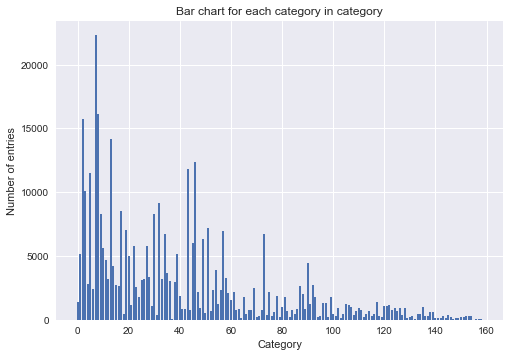

{'Publishing': 39874, 'Film & Video': 63585, 'Music': 51918, 'Food': 24602, 'Design': 30070, 'Crafts': 8809, 'Games': 35231, 'Comics': 10819, 'Fashion': 22816, 'Theater': 10913, 'Art': 28153, 'Photography': 10779, 'Technology': 32569, 'Dance': 3768, 'Journalism': 4755} 15


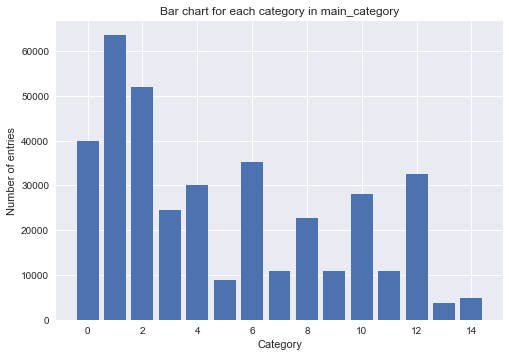

{'GB': 33672, 'US': 292627, 'CA': 14756, 'AU': 7839, 'NO': 708, 'IT': 2878, 'DE': 4171, 'IE': 811, 'MX': 1752, 'ES': 2276, 'N,0"': 3797, 'SE': 1757, 'FR': 2939, 'NL': 2868, 'NZ': 1447, 'CH': 761, 'AT': 597, 'DK': 1113, 'BE': 617, 'HK': 618, 'LU': 62, 'SG': 555, 'JP': 40} 23


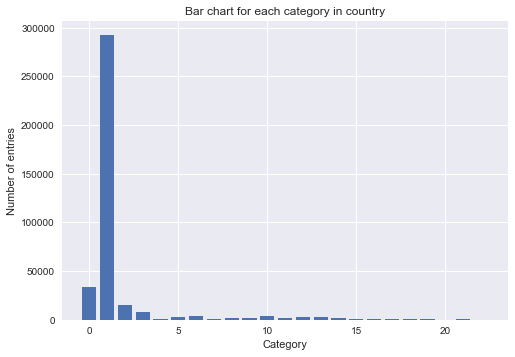

{'GBP': 34132, 'USD': 295365, 'CAD': 14962, 'AUD': 7950, 'NOK': 722, 'EUR': 17405, 'MXN': 1752, 'SEK': 1788, 'NZD': 1475, 'CHF': 768, 'DKK': 1129, 'HKD': 618, 'SGD': 555, 'JPY': 40} 14


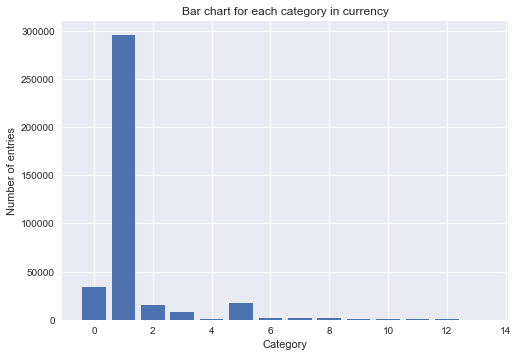

In [17]:
#Categorical variable
for i in ['category','main_category','country','currency']:
    countx =catcount(data[i])
    print(countx,len(countx))
    plt.bar(np.arange(len(countx.keys())),list(countx.values()))
    plt.title('Bar chart for each category in {}'.format(i))
    plt.xlabel('Category')
    plt.ylabel('Number of entries')
    plt.show()

As Currency is related to Country, I am using one of them i.e. country as most country use USD

In [18]:
#Calculating Duration of project from launched date to deadline date and using duration instead of the two dates
df2 = pd.DataFrame(np.random.randint(1, size=(378661,1 )), columns=['duration'])
for i in tqdm(range(len(data))):
    x = datetime.strptime(((data['launched'][i]).split(' '))[0],'%Y-%m-%d')
    y = datetime.strptime(data['deadline'][i],'%Y-%m-%d')
    df2['duration'][i] = (y-x).days

100%|████████████████████████████████████████████████████████████████████████| 378661/378661 [03:12<00:00, 1970.57it/s]


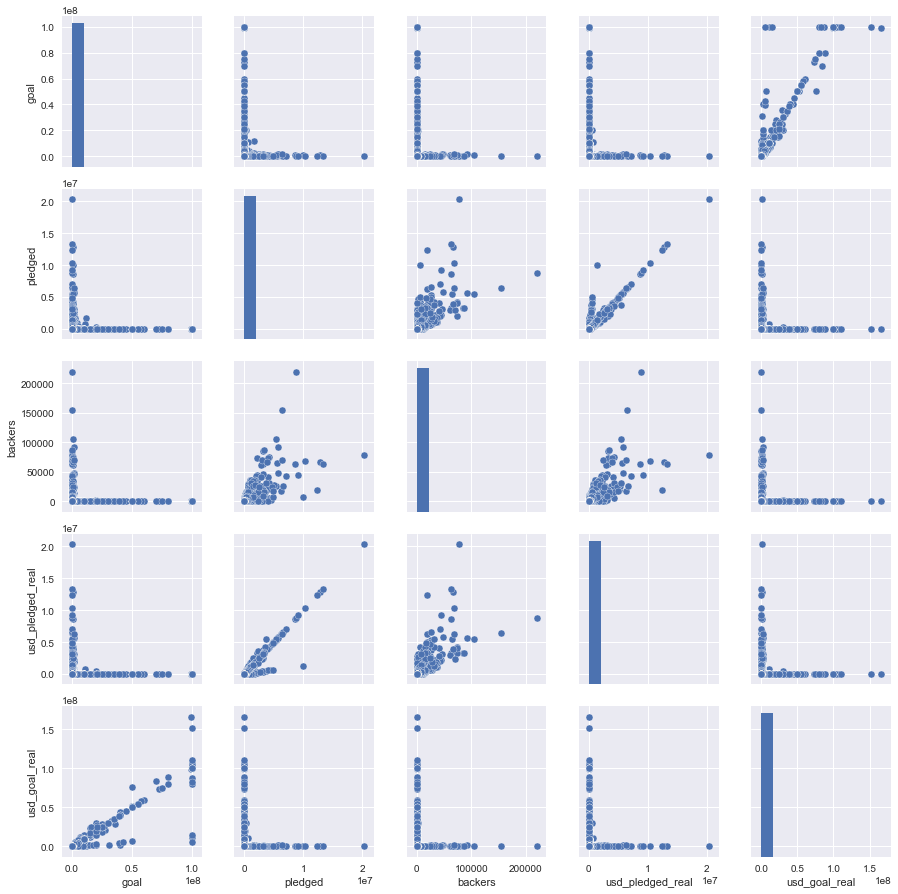

,goal,pledged,backers,usd_pledged_real,usd_goal_real
goal,1.000000,0.007358,0.004012,0.005104,0.942692
pledged,0.007358,1.000000,0.717079,0.952843,0.005024
backers,0.004012,0.717079,1.000000,0.752539,0.004517
usd_pledged_real,0.005104,0.952843,0.752539,1.000000,0.005596
usd_goal_real,0.942692,0.005024,0.004517,0.005596,1.000000


In [19]:
#Continuous variable
#Plotting correlation between Continuous variable
sns.pairplot(c_data)
plt.show()
c_data.corr()

It is clear from the above correlation matrix goal and usd_goal_real are highly correlated and similarly pledged and usd_pledged_real as they are dervied values or conversion from one currency to USD.As such I am using usd values so that all values are in USD to get proper model.

In [20]:
#Creating dummies variable for categorical variable
dummies = pd.get_dummies(data[['main_category','category','country']])

In [21]:
#Droping columns which is modified or will not be used
data = data.drop(['ID','name','launched','main_category','category','country','deadline','currency','goal','pledged','usd pledged','state'],axis =1)


In [22]:
#Adding columns of modified data columns
data = pd.concat([data,dummies,df2],axis=1)

In [23]:
#Creating Dependent and Independent variable
X = data.iloc[:,:].values
Y = Y.astype(int)

In [24]:
#Divide into train and test set
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)


C:\Users\prans\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Training Model

Used XgBoost classifier and used GridSearch to find the optimal parameters. 

In [25]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
tuned_parameters = {"max_depth": [2,5],"n_estimators": [10,30,50],"learning_rate":[0.01,0.1]}
n_folds = 10
model_xg = XGBClassifier()
clf_xg = GridSearchCV(model_xg, tuned_parameters, cv=n_folds, refit=False)
clf_xg.fit(X_train, y_train)

model_xg = XGBClassifier(max_depth =clf_xg.best_params_['max_depth'], n_estimators =clf_xg.best_params_['n_estimators'],
                         learning_rate=clf_xg.best_params_['learning_rate'])
model_xg.fit(X_train, y_train)
y_pred = model_xg.predict(X_test)

Average Precision Score is 0.983688405084
F1 score 0.980233694622


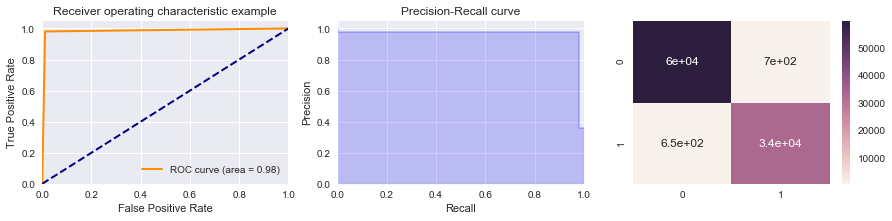

In [26]:
#Checking the performance of the model

#ROC
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
#Precision - Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred)
print("Average Precision Score is",average_precision_score(y_test,y_pred))
cm = confusion_matrix(y_test, y_pred)
print("F1 score",f1_score(y_test, y_pred))
plt.figure(figsize=[15,3])
plt.subplot(1,3,1)
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.subplot(1,3,2)
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve')
plt.subplot(1,3,3)
sns.heatmap(cm,annot=True)
plt.show()


The AUC from ROC is 98%, Average Precision score is 98% and F-1 score which harmonic mean of Precision and Recall is 98% on test set.

# Exporting model

In [27]:
from sklearn.externals import joblib
joblib.dump(model_xg, 'model.pkl') 

['model.pkl']